In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

In [54]:
init_log_file = pd.read_csv('TestVectorOperation/BenchMarkLogFile_36.csv')
init_log_file.groupby('Degree').mean()

,Iteration,OMPTime,VecTime,Auto Vec Time
Degree,,,,
16,1.766019e+06,15.026145,9.216635,7.173676
32,1.766019e+06,10.579095,10.252288,7.777661
64,1.766019e+06,22.733271,17.096056,14.594674
128,1.766019e+06,25.064689,20.685572,16.374829
256,1.766019e+06,28.287067,27.333572,22.800751
512,1.766019e+06,43.648739,52.600774,43.875931
1024,1.766019e+06,92.658221,98.358409,80.288299
2048,1.766019e+06,176.483208,230.819046,163.990240
4096,1.766019e+06,319.530986,422.967596,324.647938


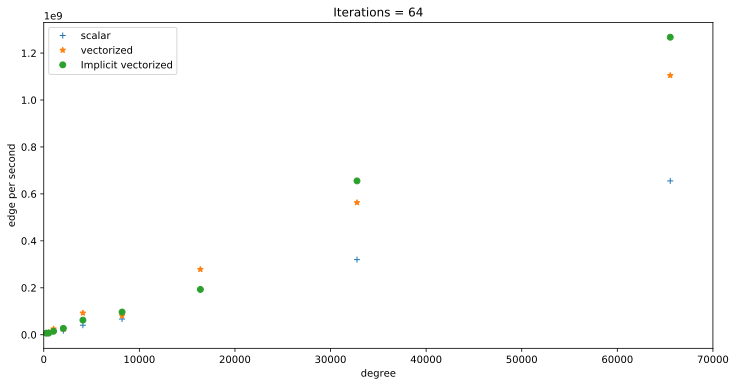

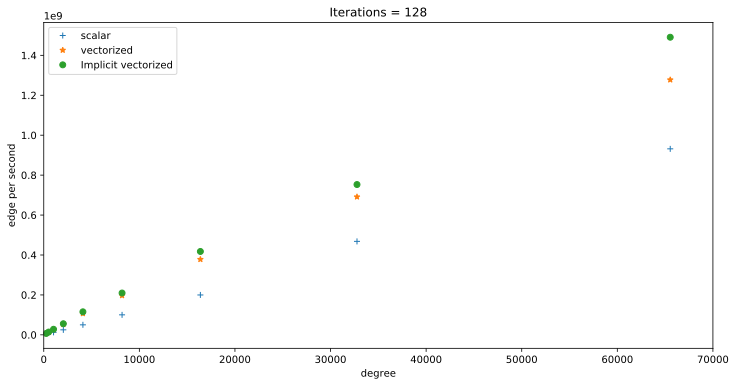

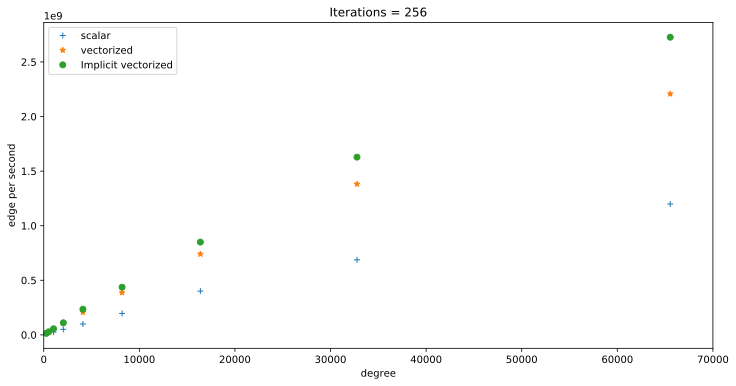

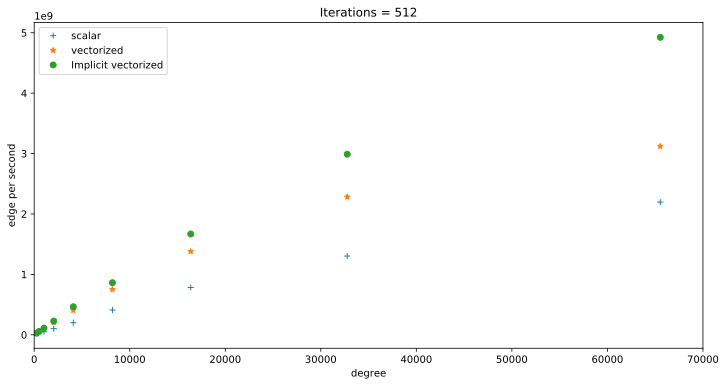

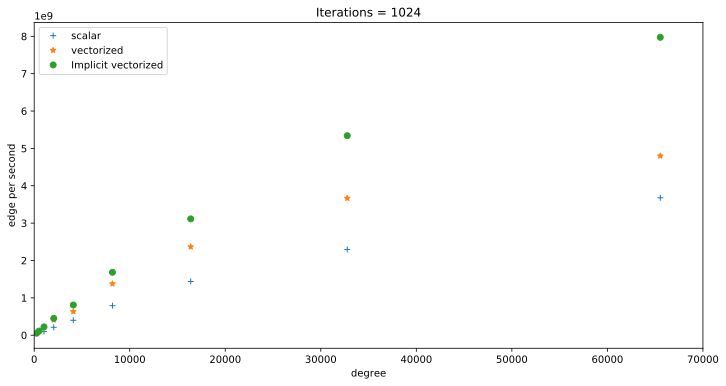

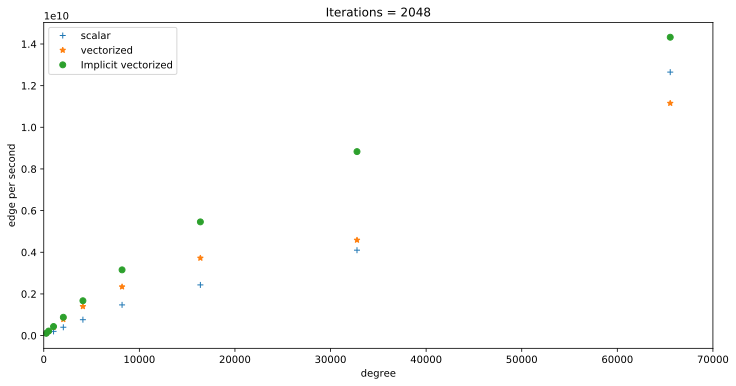

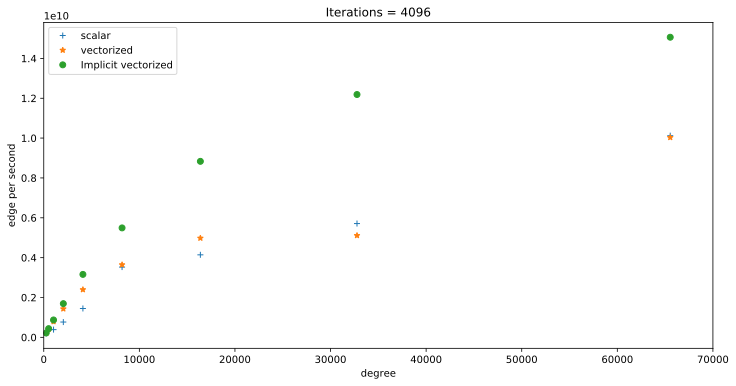

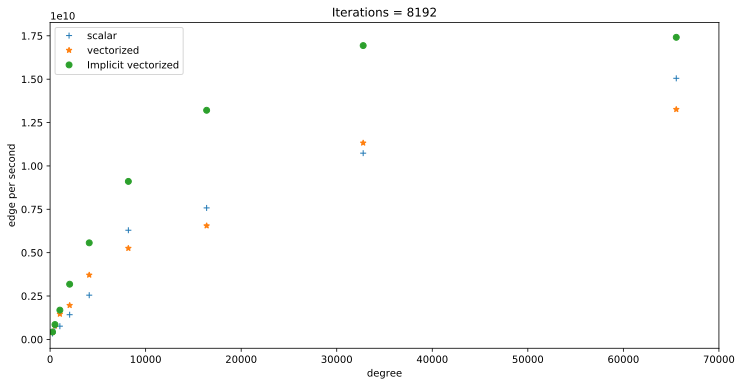

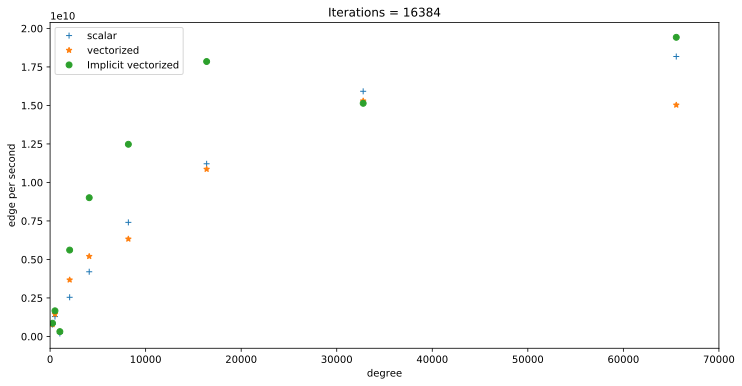

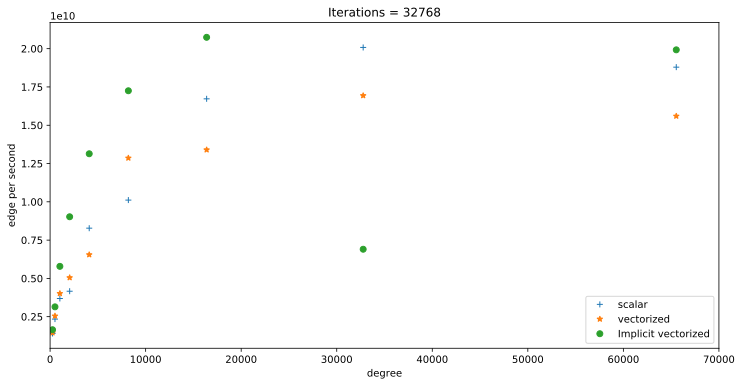

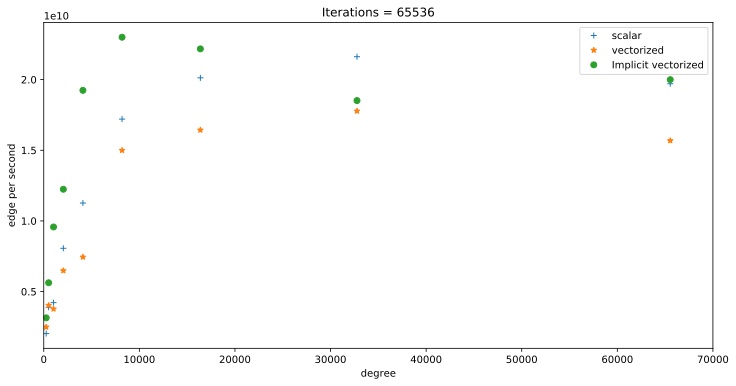

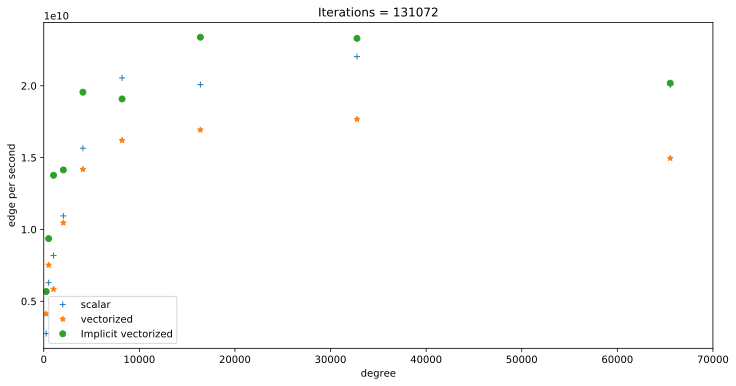

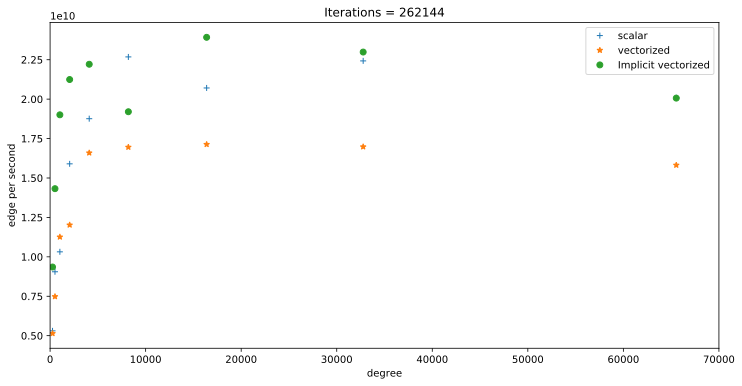

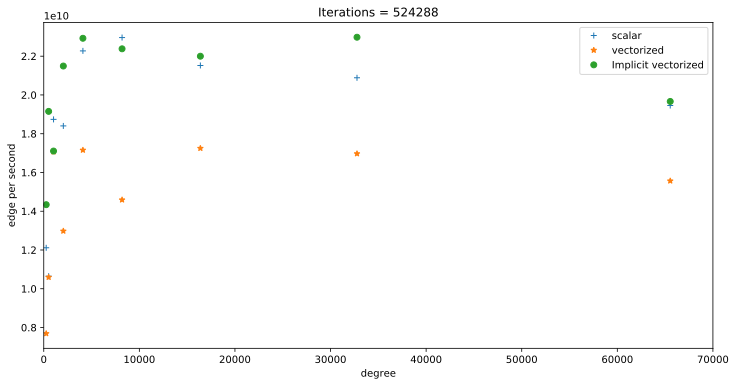

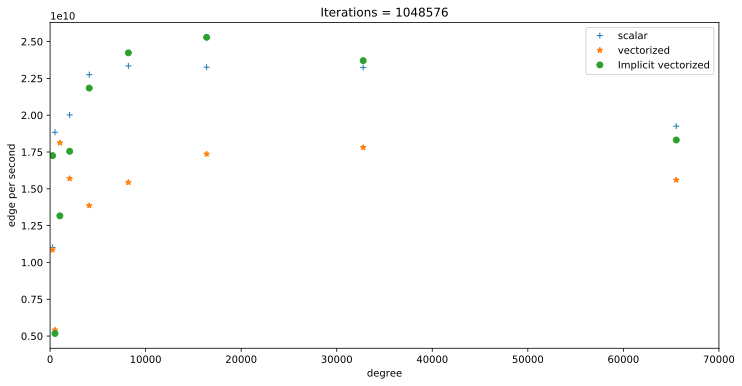

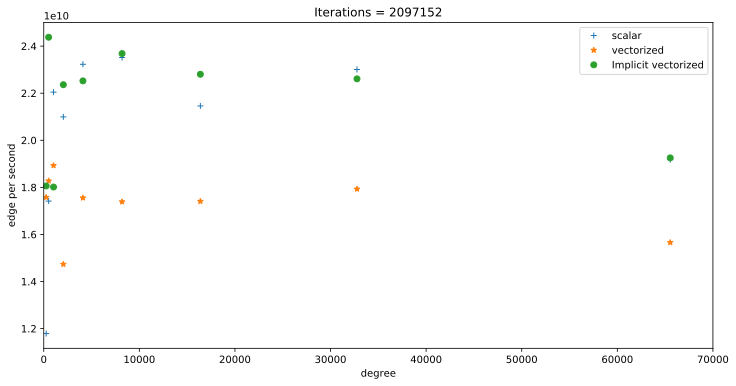

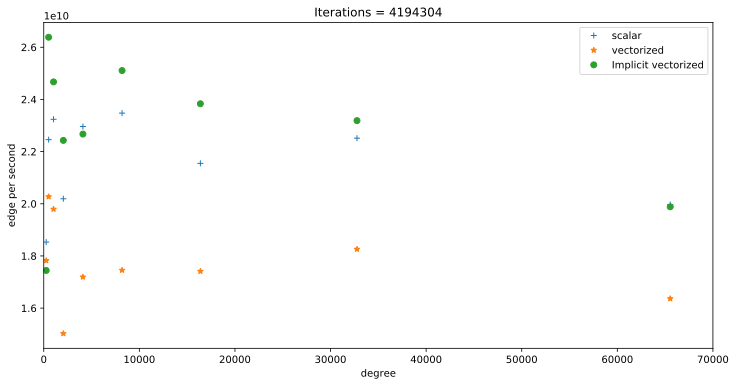

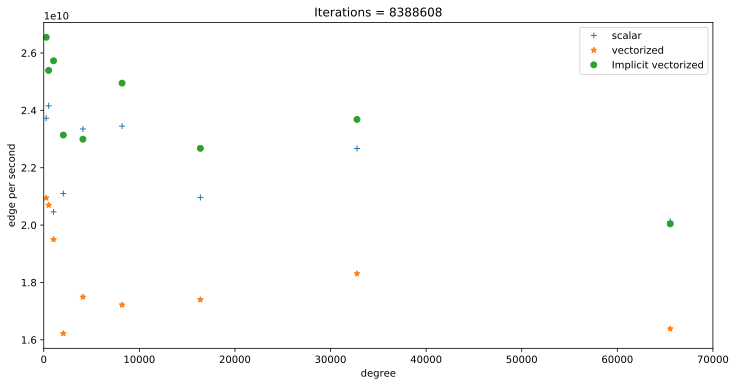

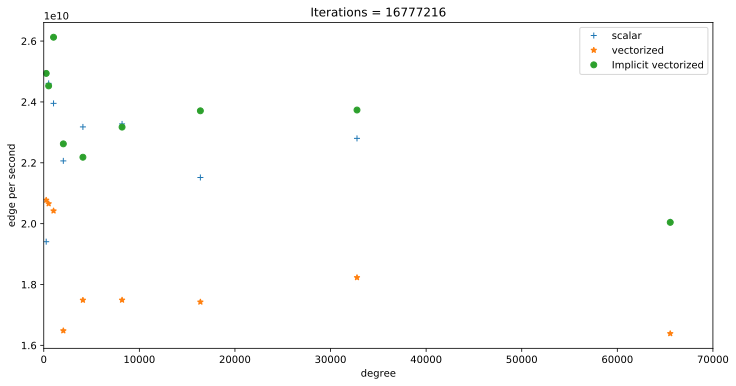

In [50]:
init_log_file = pd.read_csv('TestVectorOperation/BenchMarkLogFile_36.csv')
# init_log_file = pd.read_csv('TestVectorOperation/init_log_file_thread_36.csv')
pdf = matplotlib.backends.backend_pdf.PdfPages("scalar_vs_vectorized.pdf")
scalar = []
vectorized = []
implVectorized = []
for index,row in init_log_file.iterrows():
    scalar.append(1000*row["Degree"]*row["Iteration"]/row["OMPTime"])
#     scalar.append(1000*row["Degree"]*row["Iteration"]/row["No Vector Time"])
    vectorized.append(1000*row["Degree"]*row["Iteration"]/row["VecTime"])
    implVectorized.append(1000*row["Degree"]*row["Iteration"]/row["Auto Vec Time"])
#     vectorized.append(1000*row["Degree"]*row["Iteration"]/row["Intrinsic Time"])
init_log_file["scalar"] = scalar
init_log_file["vectorized"] = vectorized
init_log_file["Implicit vectorized"] = implVectorized
group = init_log_file.groupby(["Iteration"])
for name, data in group:
    ax = data[data["Degree"] >= 256].plot( x = "Degree", y=["scalar", "vectorized", "Implicit vectorized"], style=['+', '*', 'o'], figsize=(12,6))
    ax.set_xlim(0, 70000)
    ax.set_ylabel("edge per second")
    ax.set_xlabel("degree")
    ax.set_title("Iterations = " + str(name))
    pdf.savefig(bbox_inches = 'tight')
pdf.close()

/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

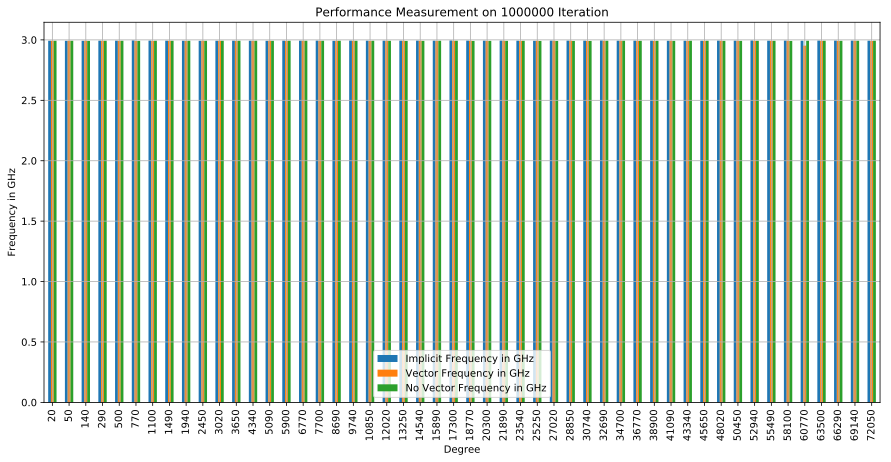

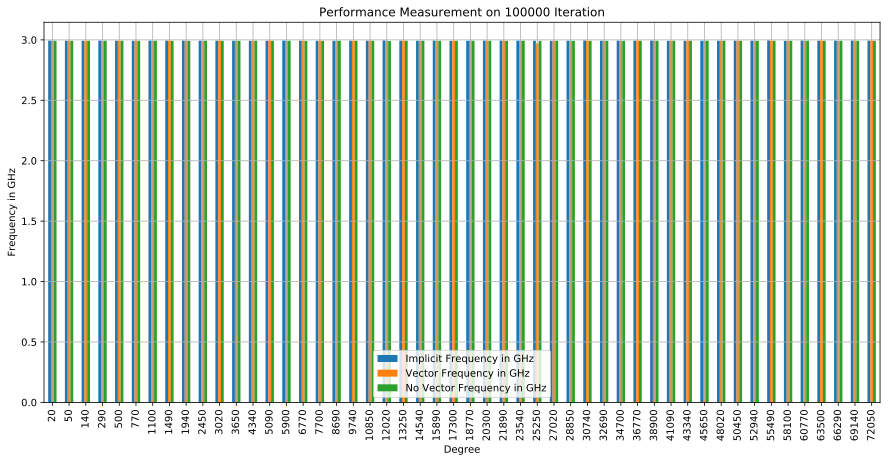

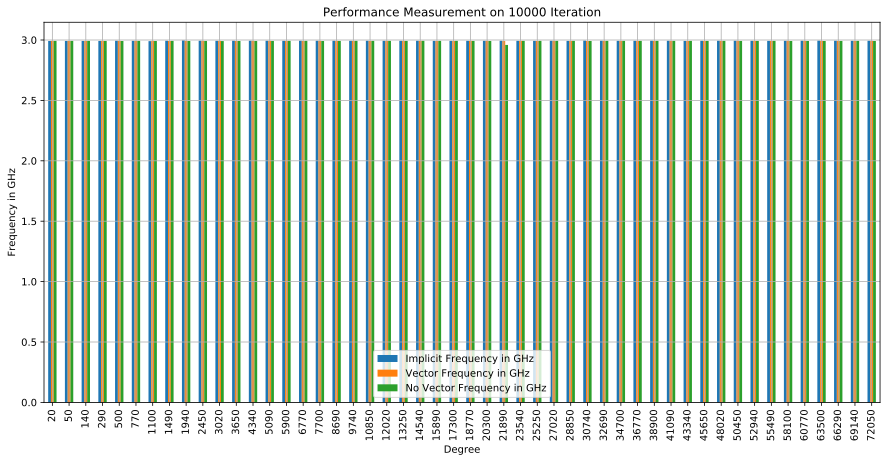

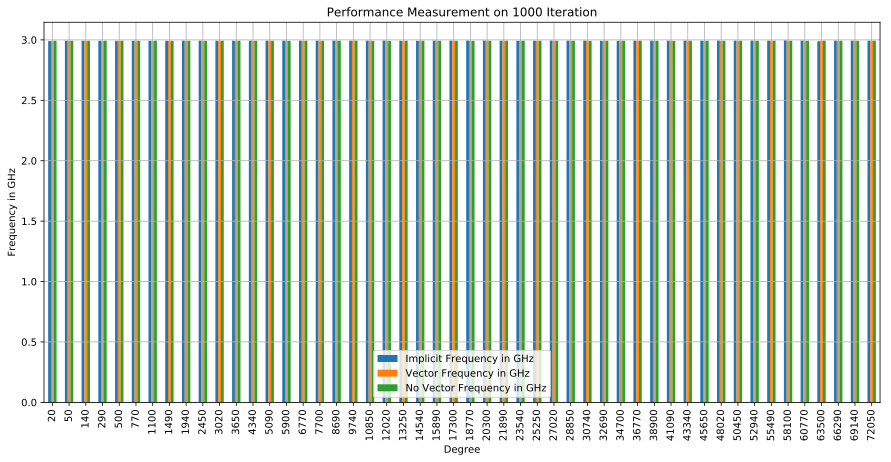

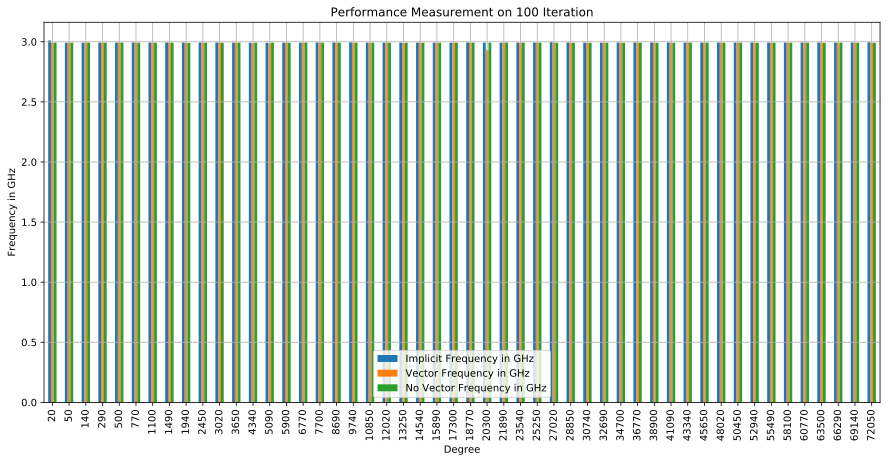

In [16]:
init_log_file = pd.read_csv('init_log_file.csv')
pdf = matplotlib.backends.backend_pdf.PdfPages("CPUFrequencyComparison.pdf")
iteration = [1000000, 100000, 10000, 1000, 100 ]
for itr in iteration:
    data = init_log_file[init_log_file['Iteration'] == itr]
    data['Implicit Frequency in GHz'] = init_log_file['Implicit Frequency']/1000000000
    data['No Vector Frequency in GHz'] = init_log_file['No Vector Frequency']/1000000000
    data['Vector Frequency in GHz'] = init_log_file['Vector Frequency']/1000000000
    ax=data.plot(kind='bar', x='Degree', y=['Implicit Frequency in GHz','Vector Frequency in GHz', 'No Vector Frequency in GHz'], title='Performance Measurement on ' + str(itr) + ' Iteration', figsize=(15,7))
    plt.grid(True)
    ax.set_ylabel('Frequency in GHz')
pdf.savefig(bbox_inches = 'tight')
pdf.close()

In [5]:
init_log_file.head()

,Degree,Iteration,Implicit Time,No Vector Time,Intrinsic Time,Implicit Frequency,No Vector Frequency,Vector Frequency
0,20,100,14.7974,12.5956,12.65750,3.010320e+09,2.993670e+09,2.992830e+09
1,50,100,11.9240,12.6613,12.66040,2.992200e+09,2.992730e+09,2.992610e+09
2,140,100,11.9397,12.6593,12.66210,2.991630e+09,2.991610e+09,2.992550e+09
3,290,100,11.8606,12.6568,1.67287,2.993830e+09,2.992810e+09,2.992730e+09
4,500,100,12.0274,12.6614,12.65680,2.994200e+09,2.992760e+09,2.992730e+09


/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

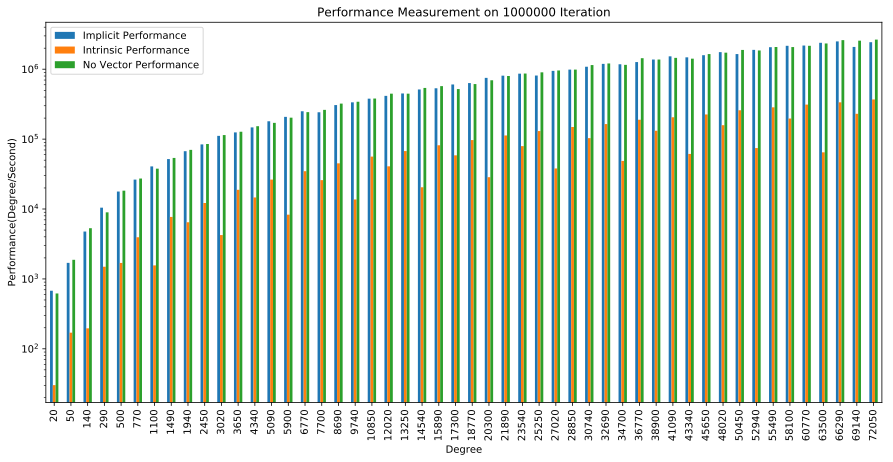

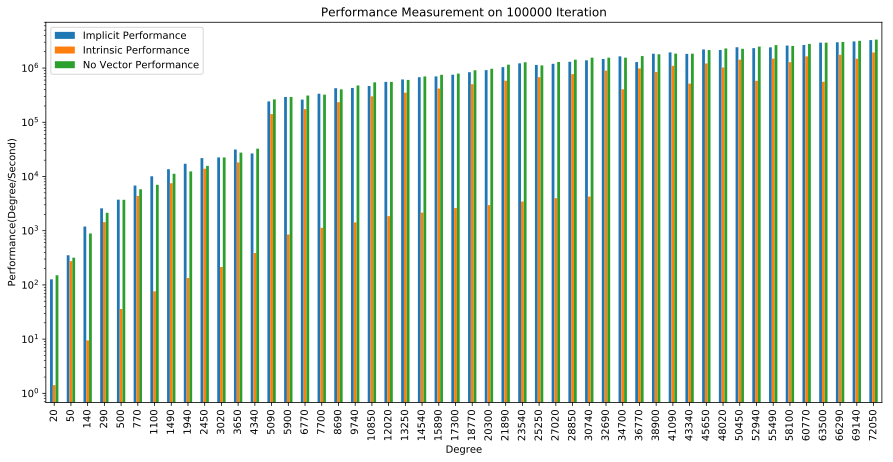

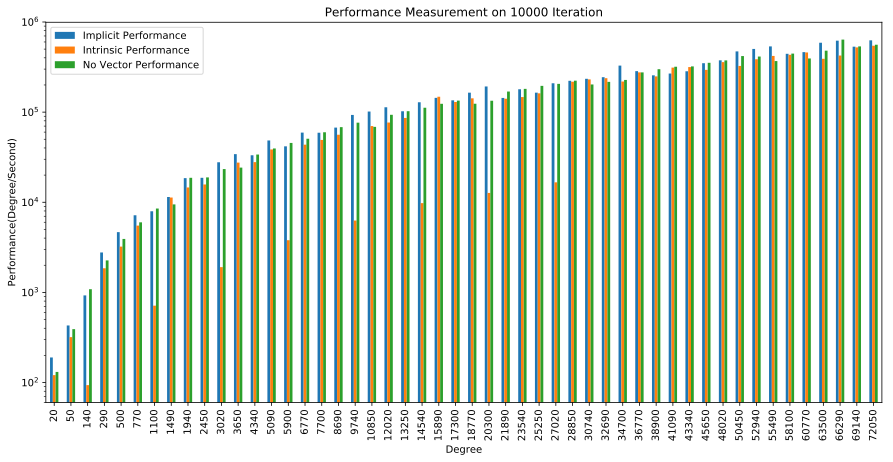

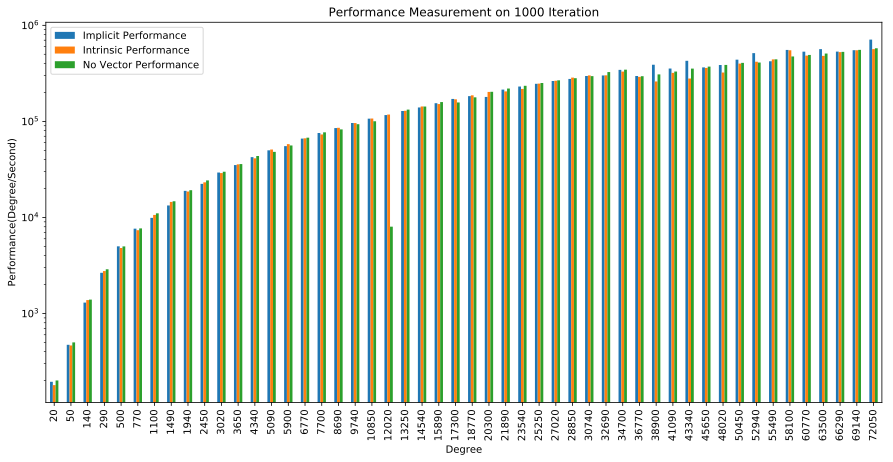

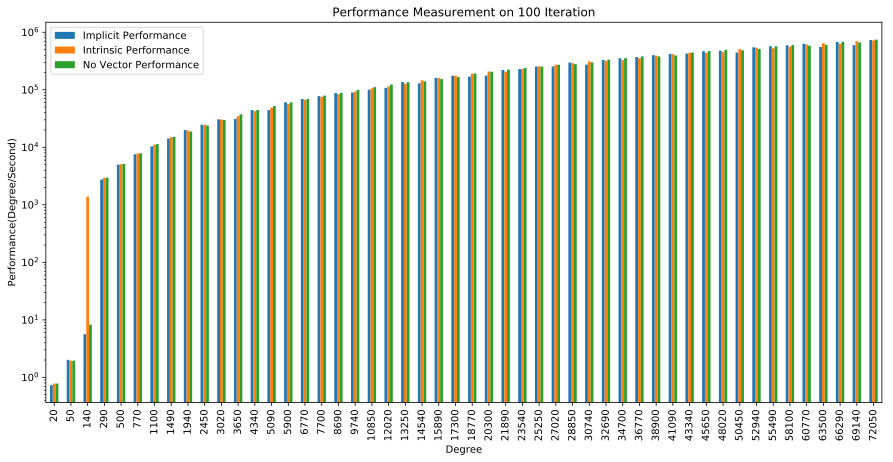

In [17]:
init_log_file = pd.read_csv('init_log_file.csv')
pdf = matplotlib.backends.backend_pdf.PdfPages("IntrinsicTimeComparisonNoScatter.pdf")
iteration = [1000000, 100000, 10000, 1000, 100 ]
for itr in iteration:
    data = init_log_file[init_log_file['Iteration'] == itr]
    data['Implicit Performance'] = init_log_file['Degree']/init_log_file['Implicit Time']
    data['No Vector Performance'] = init_log_file['Degree']/init_log_file['No Vector Time']
    data['Intrinsic Performance'] = init_log_file['Degree']/init_log_file['Intrinsic Time']
    ax=data.plot(kind='bar', x='Degree', y=['Implicit Performance','Intrinsic Performance', 'No Vector Performance'], title='Performance Measurement on ' + str(itr) + ' Iteration', logy=True, figsize=(15,7))
    ax.set_ylabel('Performance(Degree/Second)')
pdf.savefig(bbox_inches = 'tight')
pdf.close()